# 6. 프로젝트: 모든 장르간 편향성 측정해 보기

## 목차
- 1. 프로젝트 개요
- 2. 데이터셋 
- 3. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기
- 4. 추출된 결과로 embedding 모델 만들기
- 5. target, attribute 단어 셋 만들기
- 6. WEAT score 계산과 시각화

## 1. 프로젝트 개요

- 모든 장르에 대한 영화 구분과의 편향성 정도를 측정

### 워드 임베딩 속의 편향성
![편향성.png](./images/편향성.png)
- 위 그림은 2016년에 발표된 ['Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings'](https://arxiv.org/pdf/1607.06520.pdf)라는 논문에 포함된 것
- 이 논문의 저자는 학습된 Word Embedding을 2차원으로 차원 축소해서 시각화했을 때, 분명히 젠더 중립적인 딘어임에도 불구하고 Programmer, Doctor, Engineer 등의 단어는 남성대명사 He에 가깝게, Homemaker, Nurse, Hairdresser 등의 단어는 여성대명사 She에 가깝게 위치하는 것을 보여 줌으로써 큰 반향을 불러일으킴
- 사람이 가지고 있을지도 모르는 편견이 워드 임베딩 속 벡터들에 고스란히 반영되어 있었다는 것을 보여줌

### WEAT(Word Embedding Association Test)
- 워드 임베딩 벡터들 간에는 의미적인 유사도 거리를 정량적으로 측정할 수 있음
- 그렇다면 원드 임베딩에 내포된 편향성도 정량적으로 측정할 방법은 없을까?
- 위 논문이 발표되자마자 몇 달도 되지 않아 그런 방법이 제안되었음
<br>

- **Word Embedding Association Test(WEAT)**는 임베딩 모델의 편향을 측정하는 방식 중 하나로, 2016년에 Aylin Caliskan이 제안했음
    - 논문 원본: [Semantics derived automatically from language corpora necessarily contain human biases](https://arxiv.org/pdf/1608.07187.pdf)
<br>

- 편향이라는 것을 어떻게 정량적으로 정의할 수 있는가
- 남자(Male)가 Scientist에, 여자(Female)가 Art에 가깝다라는 편향을 Word Embedding 상에서 정의하는 방법 생각해 보기
<br>

- 만약 Science와 Art가 모두 완벽히 젠더 중립적이라면, Word Embedding 상에서도 Science, Art가 Male, Female 두 단어와의 거리가 동일해야 할 것
- 그러나 만약 정말 편향이 존재한다면, Science와 Male 간의 거리가 Science와 Female 간의 거리보다 가깝고, 거꾸로 Art와 Male 간의 거리는 Art와 Female 간의 거리보다 멀어야 함
<br>

- 워드 임베딩 간의 거리를 코사인 유사도로 계산할 수 있다는 것을 이미 알고 있으니, 그런 방식으로 계산해 보면 편향성을 쉽게 구할 수 있을 것 같음
<br>

- 그런데 고작 4개의 단어 사이의 거리를 계산하는 방식으로 워드 임베딩 공간상에 편향이 존자한다고 단정할 수 있을까?
- 어쩌면 그저 우연히 수치가 그렇게 나타났을 뿐일 수 있지 않을까?
- 그래서 WEAT는 Male과 Female, Science아 Art라는 개념을 가장 잘 대표하는 단어들을 여러 개 골라 단어 셋(set)을 만듬
- 단어 셋에 속한 모든 단어들끼리의 편향성을 전부 계산해서 평균을 수치화해보면 보다 명확하게 개념적인 편향성이 존재함을 밝힐 수 있지 않을까?
<br>

- 이러한 단어 셋을 WEAT에서는 각각 **target**과 **attribute**라고 함
<br>

- 위의 예를 다시 들자면, Science를 대표하는 target 단어 셋 X와 Art를 대표하는 target 단어 셋 Y가 있다고 하면 X-Y셋을 통한 개념축 하나가 얻으짐
- Male을 대표하는 attribute 단어 셋 A와 Female을 대표하는 attribute 단어 셋 B가 있다면 A-B 셋을 통한 개념축 하나가 또 얻어짐
- 편형성이 없다면, X에 속한 단어들은 A에 속한 단어들과의 거리와 B에 속한 단어들과의 거리가 별 차이가 없어야 함
- 반대의 경우라면 뚜렷하게 차이가 남
- Y의 경우도 마찬가지
<br>

- 다음 스텝에 수식을 통해 보다 명확하게 설명할 WEAET score는 바로 위와 같은 방식으로 계싼된 수치
- 절댓값이 클수록 두 개념축 사이의 편향성이 크게 나타나는 것으로 해석됨
<br>

**(참고)
- WEAT 개념의 아이디어는 심리학의 **IAT(Implicit Association Test)**라는 인지편향성 실험 구조에서 따온 것
- IAT는 WEAT처럼 X-Y, A-B 두 개념축을 설정하는 점에서 동일
- 다만 단어들 사이의 거리를 측정하는 방법이 워드 임버딩간 코사인 유사도를 계산하는 방식이 아니라, 피실험자들에게 전자적으로 단어 연상 실험을 하면서 응답 반응 소도를 측정항는 방식을 사용했을 뿐
- 심리학에 관심이 있다면 아래 링크 통해서 IAT 테스트를 수행하여 본인 무의속 속에 있는 편향성 측정해 보기
    - [IAT 홈페이지: Project Implicit](https://implicit.harvard.edu/implicit/education.html)
- 아래 표는 구글의 테크블로그에서 WEAT 개념을 소개하면서 첨부한 실험 결과표
    - [Text Embedding Models Contain Bias. Here's Why That Matters](https://developers.googleblog.com/2018/04/text-embedding-models-contain-bias.html)
![WEAT.png](./images/WEAT.png)
- 표에서 파란색은 사람의 편향과 같은 경우이고, 노란색은 사람의 편향과 반대인 경우를 의미(사람이 가진 편향은 Implicit Association Tests로 측정했음)
<br>

- 표를 보면 대부분의 색이 파란색인 것을 볼 수 있음
- 이 표가 또한 말해주는 것은 사람이 가진 편향이 자연어 코퍼스 데이터에 반영되어 있고, 이 데이터로 만든 워드 임베딩 모델은 그 편향을 내재할 수 밖에 없다는 점
<br>

- 꽃과 벌레, 유쾌함과 불쾌함 등 누구나 동의할만한 편향성이 존재하는 경우엔 대부분의 경우 WEAT score의 절댓값이 1.5 이상으로 뚜렷한 편향성수치가 나오는 것을 볼수 있음
- 그 외에도 다양한 개념축간 편향성이 존재하는 것을 흥미롭게 살펴볼 수 있음
<br>

- Glove, Word2Vec 등 다양한 워드 임베딩 모델에 대해 동일한 실험을 하여 WEAT score를 측정해 보 결과도 흥미로움
- 모델마다 WEAT score가 동일하게 나오는 것이 아님
- 이런 차이점의 원인을 분석해 보는 것도 흥미로울 것 같음

### 루브릭
- 아래의 기준을 바탕으로 프로젝트 평가
|평가문항|상세기준|
|---|---|
|1. 주어진 영화 코퍼스를 바탕으로 워드임베딩 모델을 정상적으로 만들었다. |워드임베딩의 most_similar() 메소드 결과가 의미상 바르게 나왔다.|
|2. 영화 구분, 장르별로 target, attribute에 대한 대표성있는 단여 셋을 생성하였다.|타당한 방법론을 통해 중복이 잘 제거되고 개념축을 의미적으로 잘 대표하는 단어 셋이 만들어졌다.|
|3. WEAT score 계산 및 시각화를 정상적으로 진행하였다.|전체 영화 장르별로 예술/일반 영화에 대한 편향성 WEAT score가 상식에 부합하는 수치로 얻어졌으며 이를 잘 시각화하였다.|

## 2. 데이터셋 

- synopsis.txt(대략 17MB)에는 2001년부터 2019년 8월까지 제작된 영화들의 시놉시스 정보가 있음
- 개봉된 영화 중 일부만 포함되어 있음
- 더 많은 영화 정보를 원하면 KOBIS에서 확인

- WEAT score를 구할 때 단어 셋을 만들어주어야 함
- targets_X, targets_Y, attribute_A, attribute_B를 만들어주었던 것처럼, 2개의 축을 어떤 기준으로 잡고, 해당 축의 어떤 항목을 사용할지 정하기
<br>

- 이번 프로젝트에서는 두 축을 영화 장르, 영화 구분 정보를 이용(영화 구분 정보란 일반영화, 예술영화, 독립영화로 구분된 정보)
- KOBIS에서 제공한 정보를 기준으로 분류
<br>

- 영화 구분
    - synopsis_art.txt: 예술영화
    - synopsis_gen.txt: 일반영화(상업영화)
    - 그 외는 독립영화 등으로 분류
- 장르 구분
    - synopsis_SF.txt: SF
    - synopsis_가족.txt: 가족
    - synopsis_공연.txt: 공연 
    - synopsis_공포(호러).txt: 공포(호러) 
    - synopsis_기타.txt: 기타
    - synopsis_다큐멘터리.txt: 다큐멘터리
    - synopsis_드라마.txt: 드라마
    - synopsis_멜로로맨스.txt: 멜로로맨스
    - synopsis_뮤지컬.txt: 뮤지컬
    - synopsis_미스터리.txt: 미스터리
    - synopsis_범죄.txt: 범죄
    - synopsis_사극.txt: 사극
    - synopsis_서부극(웨스턴).txt: 서부극(웨스턴)
    - synopsis_성인물(에로).txt: 성인물(에로)
    - synopsis_스릴러.txt: 스릴러
    - synopsis_애니메이션.txt: 애니메이션
    - synopsis_액션.txt: 액션
    - synopsis_어드벤처.txt: 어드벤처
    - synopsis_전쟁.txt: 전쟁
    - synopsis_코미디.txt: 코미디 
    - synopsis_판타지.txt: 판타지

## 3. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [2]:
import numpy as np
from numpy import dot
import seaborn as sns
from numpy.linalg import norm
from konlpy.tag import Okt
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end = '')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [4]:
# 약 15분정도 걸림

okt = Okt()
tokenized = []

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            # "Adjective", "Verb" 등을 포함할 수도 있음
            if w[1] in ["Noun"]:
                # 명사일 때만 tokenized 에 저장하게 됨
                res.append(w[0])    
        tokenized.append(res)

In [5]:
print(len(tokenized))

71156


In [6]:
tokenized[0]

['사운드', '엔지니어', '상우', '유지태', '분', '치매', '할머니', '백성희', '분']

## 4. 추출된 결과로 embedding 모델 만들기

In [11]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec 생성(Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size = 100, window = 5, min_count = 3, sg = 0)  
model.wv.most_similar(positive = ['영화'])

[('작품', 0.8833866119384766),
 ('다큐멘터리', 0.8506385087966919),
 ('드라마', 0.8204213380813599),
 ('영화로', 0.7947227358818054),
 ('코미디', 0.7911586165428162),
 ('시대극', 0.7783914804458618),
 ('주제', 0.7696162462234497),
 ('형식', 0.7667497396469116),
 ('소재', 0.7598264813423157),
 ('설정', 0.7538328170776367)]

In [12]:
model.wv.most_similar(positive=['사랑'])

[('행복', 0.6995243430137634),
 ('이별', 0.6988906264305115),
 ('첫사랑', 0.6953014731407166),
 ('만남', 0.6944289803504944),
 ('진심', 0.6940135359764099),
 ('아르튬', 0.6916465759277344),
 ('시빌라', 0.6899651885032654),
 ('우정', 0.682850182056427),
 ('감정', 0.6774248480796814),
 ('가슴', 0.6704019904136658)]

In [13]:
model.wv.most_similar(positive=['연극'])

[('시나리오', 0.9065871238708496),
 ('영화감독', 0.9021586775779724),
 ('영감', 0.8943200707435608),
 ('시대극', 0.8825628757476807),
 ('대본', 0.8797656893730164),
 ('각색', 0.8791568875312805),
 ('캐스팅', 0.8788147568702698),
 ('세헤라자데', 0.8759655952453613),
 ('연기', 0.8753822445869446),
 ('배우', 0.8694753646850586)]

## 5. target, attribute 단어 셋 만들기

- TF-IDF를 사용해 단어 셋을 만들면 어느 정도는 대표 단어를 잘 선정할 수 있음
- 그러나 TF-IDF가 높은 단어를 골랐음에도 불구하고 중복되는 단어가 발생하는 문제가 있었음
- 개념축을 표현하는 단어가 제대로 선정되지 않은 것은 WEAT 계산 결과에 악영향을 미침
<br>

- TF-IDF를 적용했을 때의 문제점이 무엇인지 찾고 스스로 방법 개선해 대표 단어 셋 구축해 보기
- TF-IDF 방법을 쓰더라도 중복된 단어를 잘 제거하면 여전히 유용한 방식이 될 수 있음

In [14]:
def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

### 예술, 일반 영화 단어선정

In [15]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

In [16]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [17]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [19]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [20]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 spart matrix 가져오기
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 spart matrix 가져오기 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [21]:
# 위에 출력한 것처럼 중복된 것이 많으므로 중복을 제외하고 상위n개의 단어를 추출
n = 15
w1_, w2_ = [], []

for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [22]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [23]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


### 장르별 단어 선정
- 예술영화와 일반영화를 기준으로 해당 장르를 대표하는 단어 나열해보았음
- 전 장르 가지고 대표하는 단어들을 살펴보고 편향성 측정해보기

In [24]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [25]:
# 약 10분정도 걸림
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [26]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [27]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 30):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 외계, 존재, 세상, 발견, 행성, 정체, 친구, 비밀, 사실, 기억, 전쟁, 사건, 시간, 공격, 영화, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 할머니, 씨제이, 동구, 사랑, 아이, 사람, 학교, 세상, 소년, 슈이트, 이야기, 가장, 어머니, 마갈, 소녀, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 카르피, 비바, 왕자, 콘서트, 백작부인, 반니, 아리아, 미노, 차이코프스키, 라다, 무대, 도시, 공작, 리코, 시작, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 영화, 사실, 소녀, 하나, 살인, 이야기, 비밀, 아이, 정체, 저주, 살해, 영화제, 여자, 모든, 의문, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 여자, 대한, 독립, 친구, 작품, 엄마, 통해, 아시아나, 다른, 우리, 연출, 소녀, 모습, 아이, 시간, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 통해, 그녀, 여성, 가족, 한국, 작품, 환경, 사회, 모습, 아이, 마을, 노동자, 세상, 가장, 기록, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 가족, 단편, 서울, 대한, 아들, 마음, 아이, 남편, 서로, 시간, 소녀, 세상, 감독, 다른, 모든, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 관계, 부부,

## 6. WEAT score 계산과 시각화

- 영화 구분, 영화 장르에 따른 편향성을 측정하여 WEAT score로 계산해보기
- 이를 Heatmap 형태로 시각화
- 편향성이 두드러지는 영화장르 attribute 구성에는 어떤 케이스가 있는지 시각적으로 두드러지게 구성

In [33]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    # 단어 w에 대해 A 데이터셋의 단어들과 코사인 유사도 구힉;
    cos_sim(w, A)  
    # 단어 w에 대해 B 데이터셋의 단어들과 코사인 유사도 구하기
    c_b = cos_sim(w, B)  
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    #, c_a, c_b
    return mean_A - mean_B

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [34]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [35]:
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in attributes[i]])
        Y = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [36]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 1.1 or matrix[i][j] < -1.1:
            print(genre_name[i], genre_name[j], matrix[i][j])

다큐멘터리 멜로로맨스 -1.2311143
다큐멘터리 성인물(에로) -1.1281343
다큐멘터리 스릴러 -1.1650622
멜로로맨스 전쟁 1.1482254


/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

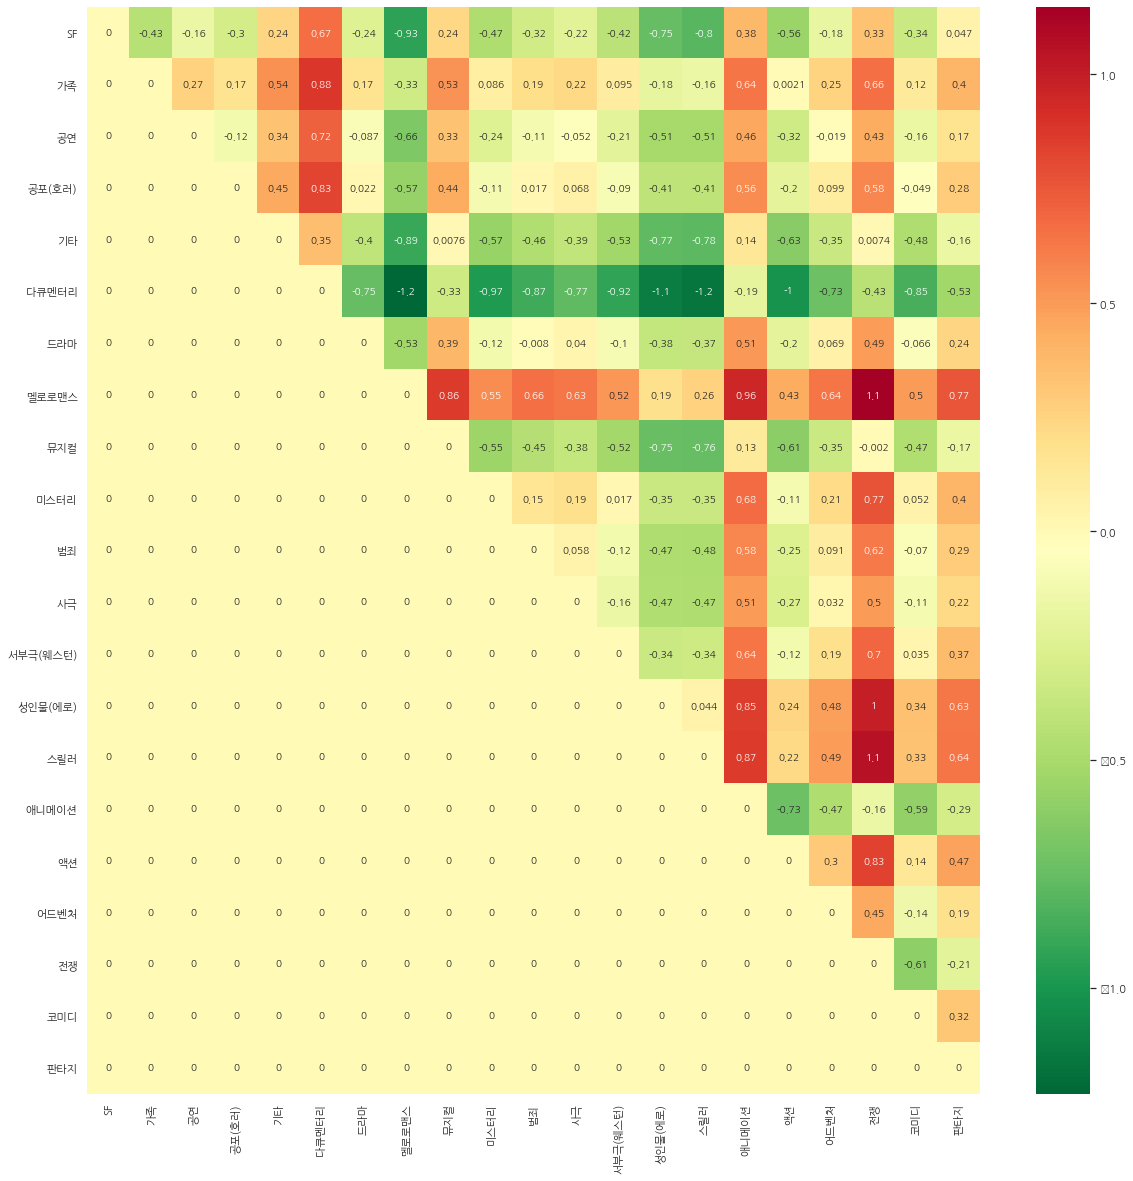

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

# 한글 지원 폰트
sns.set(font = 'NanumGothic')
plt.figure(figsize = (20,20))
ax = sns.heatmap(matrix, xticklabels = genre_name, yticklabels = genre_name, annot = True,  cmap = 'RdYlGn_r', annot_kws = {"size": 10})
ax